<a href="https://colab.research.google.com/github/OmdenaAI/KadunaNigeriaChapter_NLPMedicalPrescription/blob/faraaz/EDA_NLP_Prescription.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
import networkx as nx
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Load the dataset
file_path = '/content/drive/MyDrive/merge_demo_amos_v2.csv'
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,disease_name,description,symptoms,causes,source,table_name,treatment,url,diagnosis,medication_name,medication_url,dosage_url,prognosis,research,complications,faq,transmission
0,8285,5 common symptoms of ovulation,NaN,Very wetÂ StretchyResembling an egg-white texture,NaN,medicinenet,datafromMedicineNet,NaN,https://www.medicinenet.com/how_can_you_tell_i...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,899,a-fib (atrial fibrillation),A-fib is an irregular heartbeat that reduces y...,"A heartbeat that races, pounds, or flutters We...",NaN,drugs-com,cg-drugs-com,"Conditions that cause A-fib, such as thyroid d...",NaN,Your healthcare provider will examine you. Tel...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3599,aadc deficiency,AADC (aromatic L-amino acid decarboxylase) def...,NaN,NaN,drugs-com,condition-drugs-com,NaN,NaN,NaN,"eladocagene exuparvovec, Kebilidi",https://www.drugs.com/monograph/eladocagene-ex...,['https://www.drugs.com/dosage/kebilidi.html'],NaN,NaN,NaN,NaN,NaN
3,3600,abacterial cystitis,Alkylating Agent Cystitis is a type of cystiti...,NaN,NaN,drugs-com,condition-drugs-com,NaN,NaN,NaN,"sodium bicarbonate, citric acid/sodium citrate",https://www.drugs.com/mtm/sodium-bicarbonate.h...,['https://www.drugs.com/dosage/sodium-bicarbon...,NaN,NaN,NaN,NaN,NaN
4,610,abdominal aortic aneurysm,An abdominal aortic aneurysm is an enlarged ar...,Abdominal aortic aneurysms often grow slowly w...,Aneurysms can develop anywhere along the aorta...,mayo-clinic,all_nlp_diseases_df,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8484 entries, 0 to 8483
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       8484 non-null   int64 
 1   disease_name     8484 non-null   object
 2   description      6310 non-null   object
 3   symptoms         3176 non-null   object
 4   causes           1023 non-null   object
 5   source           8484 non-null   object
 6   table_name       8484 non-null   object
 7   treatment        2338 non-null   object
 8   url              1318 non-null   object
 9   diagnosis        1695 non-null   object
 10  medication_name  2754 non-null   object
 11  medication_url   2687 non-null   object
 12  dosage_url       2647 non-null   object
 13  prognosis        161 non-null    object
 14  research         291 non-null    object
 15  complications    299 non-null    object
 16  faq              133 non-null    object
 17  transmission     33 non-null     

In [ ]:
# Dropping column 'Unamed: 0'
if 'Unnamed: 0' in df.columns:
  df = df.drop('Unnamed: 0', axis=1)

In [ ]:
# Checking for duplicate rows
duplicate_rows = df[df.duplicated()]
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
Empty DataFrame
Columns: [disease_name, description, symptoms, causes, source, table_name, treatment, url, diagnosis, medication_name, medication_url, dosage_url, prognosis, research, complications, faq, transmission]
Index: []


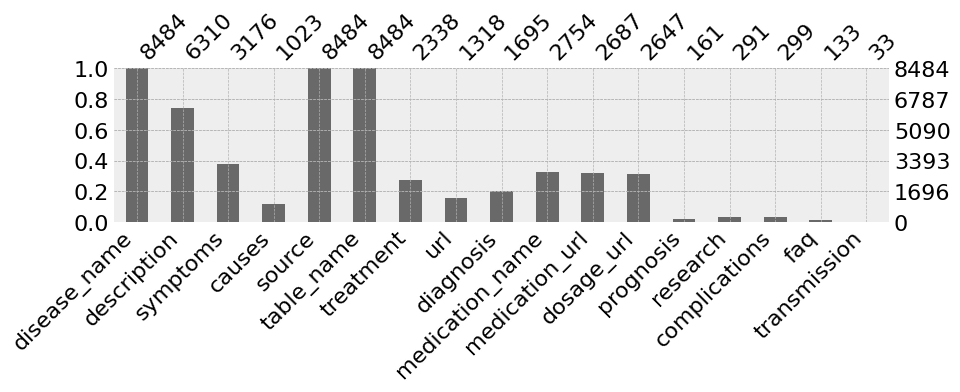

In [ ]:
# Visulaising missing value
plt.style.use('bmh')
msno.bar(df,figsize = (10,2))
plt.show()

**Distribution of Data Source**

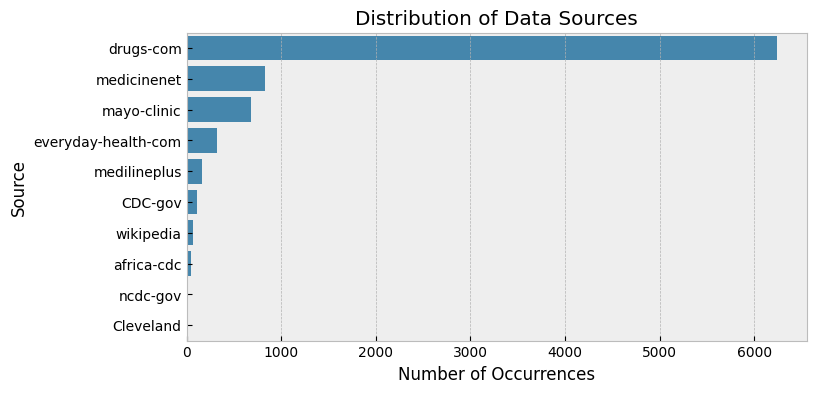

In [ ]:
source_counts = df['source'].value_counts()
plt.figure(figsize=(8, 4))
sns.barplot(x=source_counts.values, y=source_counts.index)
plt.title("Distribution of Data Sources")
plt.xlabel("Number of Occurrences")
plt.ylabel("Source")
plt.show()

**Top diseases based on occurrences**

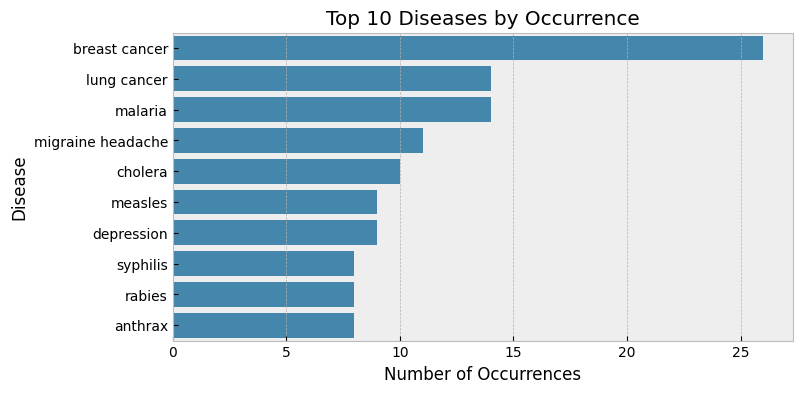

In [ ]:
disease_counts = df['disease_name'].value_counts()
plt.figure(figsize=(8, 4))
sns.barplot(x=disease_counts.head(10).values, y=disease_counts.head(10).index)
plt.title("Top 10 Diseases by Occurrence")
plt.xlabel("Number of Occurrences")
plt.ylabel("Disease")
plt.show()

**Top medication based on occurrences**

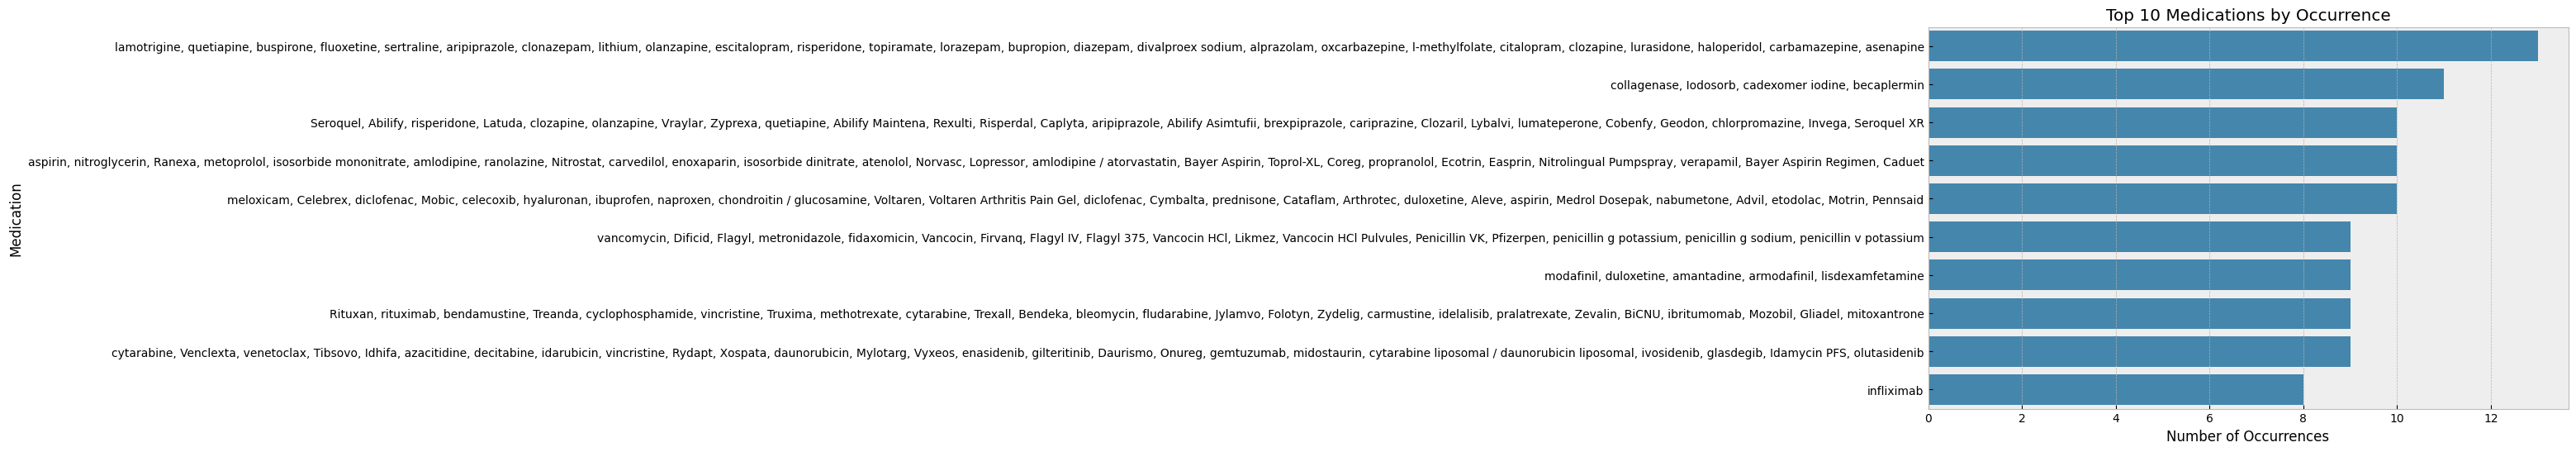

In [ ]:
medication_counts = df['medication_name'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=medication_counts.head(10).values, y=medication_counts.head(10).index)
plt.title("Top 10 Medications by Occurrence")
plt.xlabel("Number of Occurrences")
plt.ylabel("Medication")
plt.show()

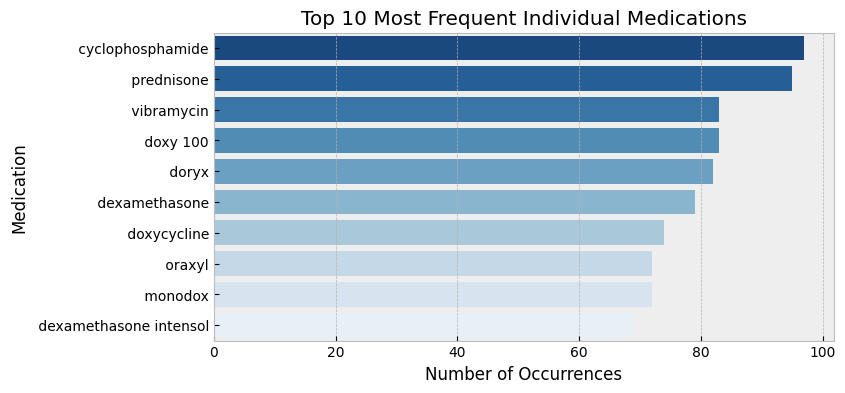

In [ ]:
# Top 10 Individual medications based on occurrences:
df['medication_name'] = df['medication_name'].astype(str)
df['medication_name'] = df['medication_name'].str.lower().str.split(',')
medication_list = [med for sublist in df['medication_name'].dropna() for med in sublist] # Flatten the list into individual entries
# Convert to DataFrame for counting
medication_counts = pd.Series(medication_list).value_counts()
medication_counts = medication_counts[medication_counts.index != 'nan']
top_medications = medication_counts.head(10)
plt.figure(figsize=(8, 4))
sns.barplot(x=top_medications.values, y=top_medications.index, palette="Blues_r")
plt.xlabel("Number of Occurrences")
plt.ylabel("Medication")
plt.title("Top 10 Most Frequent Individual Medications")
plt.show()

**Most common symptoms associated with diseases**

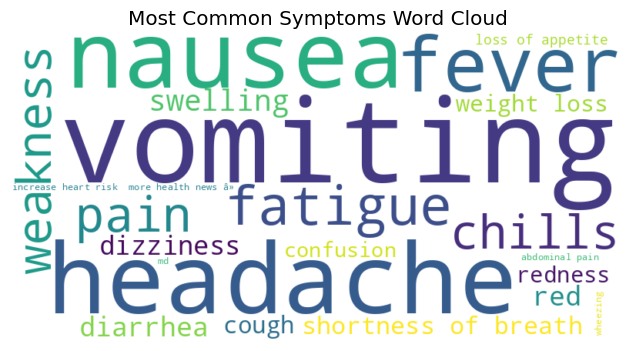

In [ ]:
df['symptoms'] = df['symptoms'].fillna("").astype(str).str.strip()
df = df[df['symptoms'] != ""]  # Remove empty strings

symptom_counts = (
    pd.Series([s.strip() for sublist in df['symptoms'].str.lower().str.split(',')
               for s in sublist if s.strip()])
    .value_counts()
)

plt.figure(figsize=(8, 4))
# Replace newline characters in index with spaces before generating the word cloud
symptom_counts.index = symptom_counts.index.str.replace('\n', ' ')
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(symptom_counts)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Symptoms Word Cloud")
plt.show()

**Analysing which diseases have the most symptoms listed**

In [ ]:
df['symptom_count'] = df['symptoms'].apply(lambda x: len(str(x).split(',')) if pd.notnull(x) else 0)
df[['disease_name', 'symptom_count']].sort_values(by='symptom_count', ascending=False).head(10)

,disease_name,symptom_count
3288,gallstones,84
4277,inflammatory bowel disease (ibd),53
5977,parathyroidectomy,47
5391,myasthenia gravis,45
6646,ptsd,45
8332,vitiligo,43
1507,cellulite,43
7588,syphilis,41
7596,syphilis in children,41
167,adhd,40


**Co-Occurrence Analysis**

In [ ]:
from itertools import combinations
from collections import Counter

co_occurrence = Counter()
for symptoms in df['symptoms'].dropna().str.lower().str.split(','):
    for combo in combinations(sorted(set(symptoms)), 2):
        co_occurrence[combo] += 1

# Convert to DataFrame
co_df = pd.DataFrame(co_occurrence.items(), columns=['Symptom Pair', 'Count'])
co_df.sort_values(by='Count', ascending=False).head(10)


,Symptom Pair,Count
4479,"( nausea, vomiting)",40
5570,"( increase heart risk\n more health news â», p...",36
6271,"( headache, vomiting)",29
6258,"( headache, nausea)",23
4265,"( diarrhea, vomiting)",22
16928,"( fever, headache)",21
29277,"( fatigue, vomiting)",18
3107,"( shortness of breath, wheezing)",18
51131,"( chills, headache)",17
19516,"( headache, muscle pain)",16


**Analyzing most common words in disease descriptions**

In [ ]:
vectorizer = CountVectorizer(stop_words='english', max_features=50)
bow_matrix = vectorizer.fit_transform(df['description'].dropna())

common_words = pd.DataFrame({'word': vectorizer.get_feature_names_out(),
                             'count': bow_matrix.toarray().sum(axis=0)})
common_words.sort_values(by='count', ascending=False).head(10)

,word,count
2,blood,815
8,cause,761
6,called,733
15,condition,709
10,causes,597
3,body,578
35,people,573
18,disease,557
46,treatment,525
41,symptoms,515


**Disease-Symptom Network Visualization**

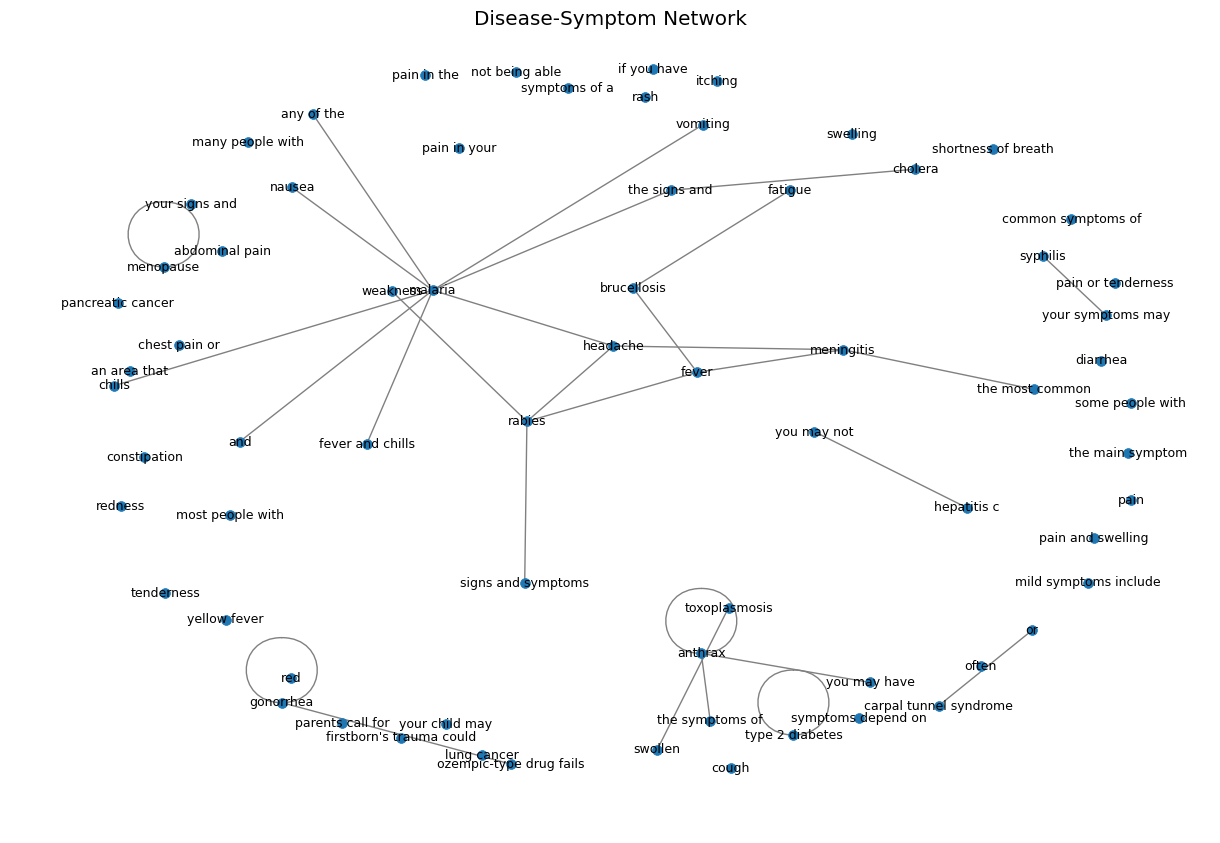

In [ ]:
df['symptoms'] = df['symptoms'].fillna("").astype(str)  # Handle NaNs
df['symptoms'] = df['symptoms'].str.replace(r'\s*\([^)]*\)', '', regex=True)  # Remove text inside parentheses
df['symptoms'] = df['symptoms'].str.split().str[:3].str.join(" ")  # Keep first 3 words for clarity

edges = []
for _, row in df.iterrows():
    disease = row['disease_name']
    symptoms = row['symptoms'].lower().split(',')

    for symptom in symptoms:
        symptom = symptom.strip()
        if symptom:  # Ensure non-empty symptom
            edges.append((disease, symptom))

G = nx.Graph()
G.add_edges_from(edges)

filtered_nodes = [node for node, degree in G.degree() if degree > 5]  # Keep symptoms appearing in ≥5 diseases and removing rare symptoms
G_filtered = G.subgraph(filtered_nodes)

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_filtered, k=0.6, seed=42)
nx.draw(G_filtered, pos, node_size=50, font_size=9, edge_color="gray", with_labels=True)
plt.title("Disease-Symptom Network")
plt.show()